# Endemo 2 - Useful Energy Demand Model Rework

## Industry Sector



### Import Packages

In [1]:
import pathlib

import xlrd as x
import pandas as pd
from pathlib import Path
import os

### Import Custom Classes

In [2]:
from control_parameters import ControlParameters
from industry_sector import Industry
from household_sector import Household
from transport_sector import Transport
from commercial_trade_services_sector import CommercialTradeServices
from countries import Country
from product import Product

### Set Input Paths

In [3]:
# change path to point to your endemo2 folder

super_path = Path(os.path.abspath(''))
input_path = super_path / 'input'
print("Input folder at " + str(input_path))

general_path = input_path / 'general'
industry_path = input_path / 'industry'


Input folder at C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\input


### Associate strings with code

SECTOR: necessary to connect the activated sectors in Set_and_Control_Parameters.xlsl with the code execution

In [4]:
SECTOR = dict({"industry":Industry(input_path / "industry"), "households":Household(), "transport":Transport(), "commertial, trade, services":CommercialTradeServices()})




### Read control parameters

In [5]:
set_and_control_parameters = pd.read_excel(input_path / 'Set_and_Control_Parameters.xlsx')
ctrl = ControlParameters(set_and_control_parameters)
print(ctrl)

sectors_active_values: {'industry': 1, 'households': 1, 'transport': 1, 'commertial, trade, services': 1}
parameter_values: {'Forecast year': 2050, 'Population forecast': 1, 'Timeseries forecast': 0, 'NUTS2 geographical resolution': 0, 'World calculation': 0, 'NUTS2 classification': 2016, 'Graphical output': 0}


### Read available countries

In [6]:
country_names = pd.read_excel(input_path / 'Set_and_Control_Parameters.xlsx', sheet_name="Countries")
Country(country_names)
print(Country)

<class 'countries.Country'>


### Read production data

In [7]:

from collections import namedtuple


gs_param_ind_subs = pd.read_excel(input_path / "Set_and_Control_Parameters.xlsx", sheet_name="IND_subsectors")

product_names = gs_param_ind_subs.get("Main subsectors")

multiply_with_scalar = lambda e, s : e.combine(e.loc[e.index >= 0, e.columns != 'Country'].apply(lambda y : y * s), lambda s1, s2 : s2, overwrite=False)

chem_prod_ren_perc = gs_param_ind_subs.loc[gs_param_ind_subs["Parameter"] == "Percentage of chemical production with renewable H2", "Value"].iloc[0] / 100
dir_steel_perc = gs_param_ind_subs.loc[gs_param_ind_subs["Parameter"] == "Percentage of direct steel in steel production", "Value"].iloc[0] / 100

Retrieve = namedtuple("Retrieve", ["file_name", "sheet_name", "sheet_transform"])
data_access_spec = {"steel": Retrieve("Steel_Production.xlsx", "Data_total", lambda x: x),
                    "steel_prim": Retrieve("Steel_Production.xlsx", "Steel_prim", lambda x: x),
                    "steel_sec": Retrieve("Steel_Production.xlsx", "Steel_sec", lambda x: x),
                    "steel_direct": Retrieve("Steel_Production.xlsx", "Data_total", lambda x: multiply_with_scalar(x, dir_steel_perc)),
                    "alu_prim": Retrieve("Aluminium_Production.xlsx", "Prim_Data", lambda x: x),
                    "alu_sec": Retrieve("Aluminium_Production.xlsx", "Sec_Data_const", lambda x: x),
                    "copper_prim": Retrieve("Copper_Production.xlsx", "Copper_WSP", lambda x : x.loc[x["Type"] == "Primary"].drop("Type", axis=1)),
                    "copper_sec": Retrieve("Copper_Production.xlsx", "Copper_WSP", lambda x : x.loc[x["Type"] == "Secondary"].drop("Type", axis=1)),
                    "chlorine": Retrieve("Chlorin_Production.xlsx", "Data", lambda x: x),
                    "ammonia": Retrieve("Ammonia_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "methanol": Retrieve("Methanol_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "ethylene": Retrieve("Ethylene_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "propylene": Retrieve("Propylene_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "aromate": Retrieve("Aromate_Production.xlsx", "Data_const", lambda x : multiply_with_scalar(x, chem_prod_ren_perc)),
                    "ammonia_classic": Retrieve("Ammonia_Production.xlsx", "Data_const", lambda x: x),
                    "methanol_classic": Retrieve("Methanol_Production.xlsx", "Data_const", lambda x: x),
                    "ethylene_classic": Retrieve("Ethylene_Production.xlsx", "Data_const", lambda x: x),
                    "propylene_classic": Retrieve("Propylene_Production.xlsx", "Data_const", lambda x: x),
                    "aromate_classic": Retrieve("Aromate_Production.xlsx", "Data_const", lambda x: x),
                    "paper": Retrieve("Paper_Production.xlsx", "Data", lambda x: x),
                    "cement": Retrieve("Cement_Production.xlsx", "Data", lambda x: x),
                    "glass": Retrieve("Glass_Production.xlsx", "Data_const", lambda x: x.drop('Comment', axis=1)),
                    }

SECTOR["industry"].load_production_data(product_names, data_access_spec)


steel                   Country          1967          1968          1969  \
0                  Belgium   9712.000000  11568.000000  12832.000000   
1                  Denmark    401.000000    457.000000    482.000000   
2                   France  19658.000000  20403.000000  22510.000000   
3                  Germany  36744.000000  41159.000000  45316.000000   
4                  Ireland     54.000000     68.000000     81.000000   
5                    Italy  15890.000000  16964.000000  16428.000000   
6               Luxembourg   4461.000000   4834.000000   5521.000000   
7              Netherlands   3401.000000   3706.000000   4712.000000   
8           United Kingdom  24324.000000  26299.000000  26096.000000   
9                  Austria   3023.000000   3467.000000   3926.000000   
10                 Finland    411.000000    729.000000    978.000000   
11                  Greece    210.000000    210.000000    450.000000   
12                  Norway    790.000000    824.000000    8

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file steel_Production.xlsx
	Unidentified Countries: ['Australia', 'New Zealand']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file steel_prim_Production.xlsx
	Unidentified Countries: ['Australia', 'New Zealand']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file steel_sec_Production.xlsx
	Unidentified Countries: ['Australia', 'New Zealand']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnident

{'steel': {'': <product.Product object at 0x000001720178D780>, 'prim': <product.Product object at 0x0000017201126950>, 'sec': <product.Product object at 0x00000172017D2BF0>}}
steel_direct            1967          1968          1969          1970          1971  \
0    5827.200000   6940.800000   7699.200000   7564.200000   7467.000000   
1     240.600000    274.200000    289.200000    283.800000    282.600000   
2   11794.800000  12241.800000  13506.000000  14264.400000  13705.800000   
3   22046.400000  24695.400000  27189.600000  27024.600000  24187.800000   
4      32.400000     40.800000     48.600000     48.000000     48.000000   
5    9534.000000  10178.400000   9856.800000  10366.200000  10471.200000   
6    2676.600000   2900.400000   3312.600000   3277.200000   3144.600000   
7    2040.600000   2223.600000   2827.200000   3025.200000   3049.800000   
8   14594.400000  15779.400000  15657.600000  16699.800000  14531.400000   
9    1813.800000   2080.200000   2355.600000   2447.4

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file steel_direct_Production.xlsx
	Unidentified Countries: ['Australia', 'New Zealand']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file alu_prim_Production.xlsx
	Unidentified Countries: ['Mozambique', 'New Zealand', 'Nigeria', 'Russia', 'South Africa', 'Ukraine', 'United States of America', 'Venezuela', 'Argentina', 'Australia', 'Brazil', 'Cameroon', 'Canada', 'Egypt', 'Ghana']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)


alu_sec       Country   2018
0      Albania    0.0
1      Algeria    0.0
2    Argentina   16.0
3      Armenia    0.0
4    Australia  130.0
..         ...    ...
95  Usbekistan    3.0
96   Venezuela    0.0
97     Vietnam    0.0
98      Zambia    0.0
99    Zimbabwe    0.0

[100 rows x 2 columns]
{'steel': {'': <product.Product object at 0x000001720178D780>, 'prim': <product.Product object at 0x0000017201126950>, 'sec': <product.Product object at 0x00000172017D2BF0>, 'direct': <product.Product object at 0x0000017201A33AF0>}, 'alu': {'prim': <product.Product object at 0x00000172018ABE20>, 'sec': <product.Product object at 0x00000172019560B0>}}


C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file alu_sec_Production.xlsx
	Unidentified Countries: ['Algeria', 'Argentina', 'Australia', 'Belarus', 'Bolivia', 'Brazil', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ghana', 'Guatemala', 'Kenya', 'Malta', 'Mexico', 'Morocco', 'New Zealand', 'Nicaragua', 'Nigeria', 'Peru', 'Russia', 'South Africa', 'Tanzania', 'Tunesia', 'United States of America', 'Uganda', 'Ukraine', 'Uruguay', 'Usbekistan', 'Venezuela', 'Zambia', 'Zimbabwe']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)


copper_prim                      Country        1960        1961        1962        1963  \
0                     Albania    1.088622    1.179340    1.859729    2.040259   
3                   Argentina         NaN         NaN         NaN         NaN   
6                     Armenia         NaN         NaN         NaN         NaN   
9                   Australia         NaN         NaN         NaN         NaN   
12                    Austria         NaN         NaN         NaN         NaN   
15                    Belgium         NaN         NaN         NaN         NaN   
18                   Botswana         NaN         NaN         NaN         NaN   
21                     Brazil    1.211999    1.659241    1.995807    1.995807   
24                   Bulgaria         NaN         NaN         NaN         NaN   
27                     Canada         NaN         NaN         NaN         NaN   
30                      Chile  504.971830  523.939254  557.224778  557.365392   
33               

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file copper_prim_Production.xlsx
	Unidentified Countries: ['Argentina', 'Australia', 'Botswana', 'Brazil', 'Canada', 'Chile', 'DR Congo', 'Mexico', 'Namibia', 'Peru', 'Russia', 'South Africa', 'United States of America', 'Uganda', 'Zambia', 'Zimbabwe']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)


copper_sec                      Country  1960  1961  1962  1963  1964  1965  1966  1967  \
1                     Albania   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4                   Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
7                     Armenia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10                  Australia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13                    Austria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16                    Belgium   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
19                   Botswana   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
22                     Brazil   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
25                   Bulgaria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
28                     Canada   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
31                      Chile   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
34                

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file copper_sec_Production.xlsx
	Unidentified Countries: ['Argentina', 'Australia', 'Botswana', 'Brazil', 'Canada', 'Chile', 'DR Congo', 'Mexico', 'Namibia', 'Peru', 'Russia', 'South Africa', 'United States of America', 'Uganda', 'Zambia', 'Zimbabwe']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file chlorine_Production.xlsx
	Unidentified Countries: ['Argentina', 'Brazil', 'Canada', 'Egypt', 'Mexico', 'Morocco', 'Osaka Soda', 'Peru', 'Russia', 'South Africa', 'Ukraine', 'United states of America', 'Venezuela']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), Invalid

{'steel': {'': <product.Product object at 0x000001720178D780>, 'prim': <product.Product object at 0x0000017201126950>, 'sec': <product.Product object at 0x00000172017D2BF0>, 'direct': <product.Product object at 0x0000017201A33AF0>}, 'alu': {'prim': <product.Product object at 0x00000172018ABE20>, 'sec': <product.Product object at 0x00000172019560B0>}, 'copper': {'prim': <product.Product object at 0x000001720178D810>, 'sec': <product.Product object at 0x000001727EB716C0>}, 'chlorine': {'': <product.Product object at 0x00000172017FF3A0>}, 'ammonia': {'': <product.Product object at 0x00000172010B1600>}, 'methanol': {'': <product.Product object at 0x00000172017D0EB0>}}
ethylene           2018                 Country
0   2622.984890                  France
1   2496.337750             Netherlands
2   4942.245083                 Germany
3   1000.000000                   Italy
4      0.000000          United Kingdom
5      0.000000                 Ireland
6      0.000000                 Denmark

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file ethylene_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file propylene_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file aromate_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: "

ammonia_classic                   Country          2018
0                   France    785.252105
1              Netherlands   1800.000000
2                  Germany   2583.012917
3                    Italy    304.979000
4           United Kingdom    313.392984
5                  Ireland      0.000000
6                  Denmark      0.223068
7                   Greece     52.975622
8                 Portugal      0.000000
9                    Spain    417.771333
10                 Belgium    830.000000
11               Luxemburg      0.000000
12                 Iceland      0.000000
13                  Norway      0.000000
14                  Sweden      0.000000
15                 Finland      0.000000
16                 Austria    400.000000
17                   Malta      0.000000
18                 Estonia     50.676300
19                  Latvia      0.000000
20               Lithuania    763.546307
21                  Poland   2028.428000
22                 Czechia    200.000000
2

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file methanol_classic_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file ethylene_classic_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)
C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file propylene_classic_Production.xlsx
	Unidentified Countries: ['Luxemburg', 'Malta']
  warnings.warn("unidentified countries found in file " + file_name + "\n\t

aromate_classic                   Country         2018
0                   France  1104.729656
1              Netherlands  2320.453033
2                  Germany  3360.677750
3                    Italy   952.727917
4           United Kingdom    66.773069
5                  Ireland     0.000000
6                  Denmark     0.000000
7                   Greece     0.000000
8                 Portugal   304.944848
9                    Spain   542.345250
10                 Belgium   785.421183
11               Luxemburg     0.000000
12                 Iceland     0.000000
13                  Norway     0.000000
14                  Sweden    10.395589
15                 Finland     0.000000
16                 Austria     0.000000
17                   Malta     0.000000
18                  Turkey     0.000000
19                 Estonia     0.003026
20                  Latvia     0.000000
21               Lithuania     0.000000
22                  Poland   552.784875
23                 Czechi

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file paper_Production.xlsx
	Unidentified Countries: ['Syrian Arab Rep.', 'Algeria', 'Angola', 'Burkina Faso', 'Cameroon', 'DR Congo', 'Congo', 'Egypt', 'Eswatini', 'Ethiopia', 'Ghana', 'Kenya', 'Libya', 'Madagascar', 'Mauritania', 'Morocco', 'Mozambique', 'Nigeria', 'South Africa', 'Sudan', 'Tanzania', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Berbados', 'Canada', 'Costa Rica', 'Cuba', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Trinidad and Tobago', 'United States of America', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela', 'Australia', 'New Zealand']
  warnings.warn("unidentified countries found in file " + file_name + "\n\tUnidentified Countries: " + str(invalid_countries), InvalidCountryName)


cement         Country         1960         1961         1962         1963  \
0    Afghanistan    37.009567    40.932240    60.033952   103.012804   
1        Albania    73.000000   120.000000   120.000000   150.000000   
2        Algeria  1062.021077  1071.913035   872.027263   883.965833   
3         Angola   161.000144   157.077471   169.016041   193.916487   
4      Argentina  2640.982235  2902.948571  2926.996262  2534.899513   
..           ...          ...          ...          ...          ...   
159      Vietnam   407.957992   457.929435   462.022659   491.016329   
160        Yemen          NaN          NaN          NaN          NaN   
161       Zambia   127.060495   121.943965   119.044598   115.974680   
162     Zimbabwe          NaN          NaN          NaN          NaN   
163          NaN          NaN          NaN          NaN          NaN   

            1964         1965         1966         1967         1968  ...  \
0     125.013883   170.039347   174.985326   129.959

C:\Users\Chris\Documents\Master_Semester_1\IDP\endemo2\countries.py:42: InvalidCountryName: unidentified countries found in file cement_Production.xlsx
	Unidentified Countries: ['Algeria', 'Angola', 'Argentina', 'Australia', 'Barbados', 'Belarus', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Burkina Faso', 'Burma', 'Burundi', 'Cameroon', 'Canada', 'Chad', 'Chile', 'Colombia', 'Congo', 'DR Congo', 'Costa Rica', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Ethiopia', 'Fiji', 'French Guiana', 'Gabon', 'Ghana', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Kenya', 'Liberia', 'Libya', 'Macau', 'Madagascar', 'Malawi', 'Mali', 'Martinique', 'Mauritania', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Namibia', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Reunion', 'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Suda

In [8]:
SECTOR["industry"].add_to_hierarchy("alu_prim", SECTOR["industry"].products["alu_prim"])
SECTOR["industry"].add_to_hierarchy("alu_sec", SECTOR["industry"].products["alu_sec"])
SECTOR["industry"].add_to_hierarchy("alu_sec", SECTOR["industry"].products["alu_sec"])
SECTOR["industry"].add_to_hierarchy("ammonia", SECTOR["industry"].products["ammonia"])
SECTOR["industry"].add_to_hierarchy("ammonia_classic", SECTOR["industry"].products["ammonia_classic"])

SECTOR["industry"].add_to_hierarchy("chlorine", SECTOR["industry"].products["chlorine"])

{'steel': {'': <product.Product object at 0x000001720178D780>, 'prim': <product.Product object at 0x0000017201126950>, 'sec': <product.Product object at 0x00000172017D2BF0>, 'direct': <product.Product object at 0x0000017201A33AF0>}, 'alu': {'prim': <product.Product object at 0x00000172018ABE20>, 'sec': <product.Product object at 0x00000172019560B0>}, 'copper': {'prim': <product.Product object at 0x000001720178D810>, 'sec': <product.Product object at 0x000001727EB716C0>}, 'chlorine': {'': <product.Product object at 0x00000172017FF3A0>}, 'ammonia': {'': <product.Product object at 0x00000172010B1600>, 'classic': <product.Product object at 0x0000017201A65C30>}, 'methanol': {'': <product.Product object at 0x00000172017D0EB0>, 'classic': <product.Product object at 0x00000172017FD000>}, 'ethylene': {'': <product.Product object at 0x0000017201A64730>, 'classic': <product.Product object at 0x0000017201B86FB0>}, 'propylene': {'': <product.Product object at 0x00000172017FE380>, 'classic': <produc

In [9]:
prod = SECTOR["industry"].products["alu_prim"]

In [10]:
dir(prod)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_amount_series',
 '_name',
 '_specific_demand',
 'predict_amount_for_year',
 'predict_spec_dem_for_year']

# New

## Test Utility functions
### Test Regression

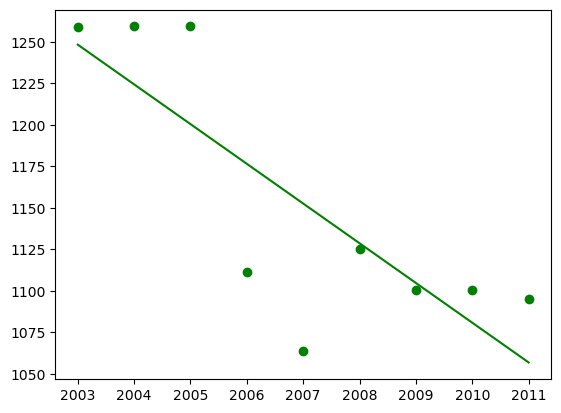

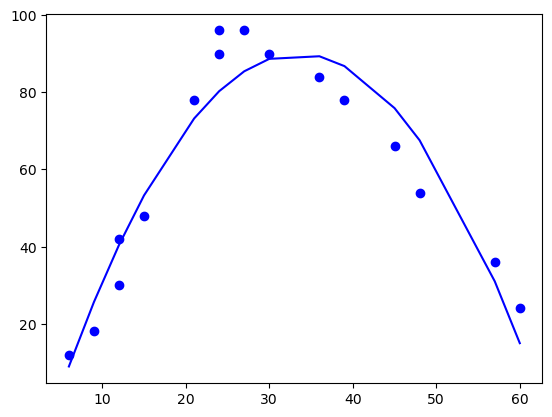

(-30.25286763906007, 7.173061390898329, -0.10698871880667692)

In [11]:
import utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [12]:
import numpy as np
import math
import utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_NaN_and_Inf(data)

[(6, 12),
 (12, 42),
 (15, 48),
 (21, 78),
 (24, 90),
 (24, 96),
 (27, 96),
 (30, 90),
 (36, 84),
 (39, 78),
 (45, 66),
 (48, 54),
 (57, 36),
 (60, 24)]

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [13]:
import utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


[(200, 2000), (300, 3000), (500, 5000)]
[(200, 2000), (300, 3000), (500, 5000)]
